<a href="https://colab.research.google.com/github/EnesGokceDS/Amazon_Reviews_NLP_Capstone_Project/blob/master/2_Amazon_Review_Data_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning/NLP_capstone_data')
os.listdir('.')

['Reviews.csv',
 'Amazon_reviews_processed.csv',
 'Amazon_reviews_cleaned_finalform.csv',
 'Amazon_reviews_after_sentiment.csv']

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('Amazon_reviews_processed.csv')
df.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,bought several vitality canned dog food produc...,21,3,0,0,1,23,164,6.2
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled jumbo salted peanutsth...,12,7,0,0,0,18,136,6.6
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says it all,confection around centuries light pillowy citr...,42,18,0,0,2,40,285,6.1
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,looking secret ingredient robitussin believe f...,15,5,0,0,4,18,128,6.2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy great price wide assortment yummy ...,12,5,0,0,0,13,83,5.5


**Cleaning Outliers** 

In [0]:
df.describe().round(0)

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
count,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0
mean,284227.0,2.0,2.0,4.0,32.0,17.0,0.0,0.0,3.0,41.0,269.0,6.0
std,164099.0,8.0,8.0,1.0,32.0,25.0,0.0,1.0,6.0,43.0,281.0,1.0
min,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0
25%,142114.0,0.0,0.0,4.0,13.0,5.0,0.0,0.0,1.0,17.0,110.0,5.0
50%,284224.0,0.0,1.0,5.0,23.0,10.0,0.0,0.0,2.0,29.0,184.0,6.0
75%,426342.0,2.0,2.0,5.0,40.0,20.0,0.0,0.0,4.0,50.0,323.0,6.0
max,568454.0,866.0,923.0,5.0,1295.0,2035.0,34.0,32.0,334.0,1977.0,14782.0,10.0


As we can see from here, there are lots of outliers here. Let's check distribution of each feature and clean outliers.

###Distribution of HelpfulnessNumerator

From the describe, we can see that there is a huge different third quantile value and max value.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


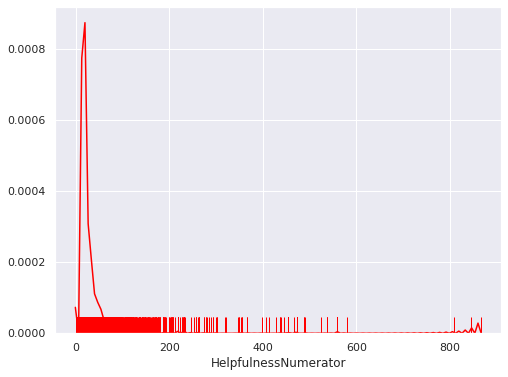

In [0]:
plt.figure(figsize=(8, 6))
sns.distplot(df.HelpfulnessNumerator, rug=True, hist=False, color = 'red')


The density plot also show that there are outliers values. We need to keep in mind that 3rd quantile value for this feature is 2. We can see there are is a huge gap between max HelpfulnessNumerator value and the value at 75%. (3rd quantile)

In [0]:
df.loc[df.HelpfulnessNumerator >= 450].Text.head(50).tolist()

['good opportunity sample various timothys kcup selections find favorites cant beat convenience consistency kcup system since dont see amazon provided description whats included variety packbr includes two following varieties breakfast blend kona parisian nights espresso extra bold colombian dorado italian blend hazelnut colombian decaf chai tea green tea english breakfast tea canarino',
 'ecobrew reusable keurig kcup great brewing coffee seems well designed easy use one things felt bad bought keurig coffee maker fact although great convenient coffee maker tend produce lots waste buy disposable kcups think product ends saving lots money long run kcups quite expensive really love product really cant find anything bad say another product called solofill essentially thing made another company products youre curious stack one another check paragraph may want research make sure keurig coffee maker compatible ecobrew solofill know kcup coffee makers compatible products mr coffee single kcup 

As we can see here, there serious number of repetitions in reviews. There are lots of same reviews. There is something wrong with these reviews. Therefore, I will drop reviews that has HelpfulnessNumerator is bigger than 100. 

In [0]:
df.loc[df.HelpfulnessNumerator >= 500].Text.head(50)

88401     good opportunity sample various timothys kcup ...
96098     ecobrew reusable keurig kcup great brewing cof...
116793    ecobrew reusable keurig kcup great brewing cof...
130468    ecobrew reusable keurig kcup great brewing cof...
190718    see update end reviewbr lamenting frech lettuc...
190719    bought aerogarden wife back may ill start posi...
207696    ordered one fresh whole rabbits arrived head f...
210495    ecobrew reusable keurig kcup great brewing cof...
235705    product called hunmatsuryokucha japanese macch...
287166    ecobrew reusable keurig kcup great brewing cof...
293117    ecobrew reusable keurig kcup great brewing cof...
297346    ecobrew reusable keurig kcup great brewing cof...
303052    huge fan keurig brewing delighted discover sol...
373547    ecobrew reusable keurig kcup great brewing cof...
375888    huge fan keurig brewing delighted discover sol...
385419    ecobrew reusable keurig kcup great brewing cof...
467765    ecobrew reusable keurig kcup g

In [0]:
df = df.loc[df.HelpfulnessNumerator <= 100] 

###Distribution of HelpfulnessDenominator

HelpfulnessDenominator is another feature that has extreme values.

Let's see the distribution of the HelpfulnessDenominator values by using density plot.

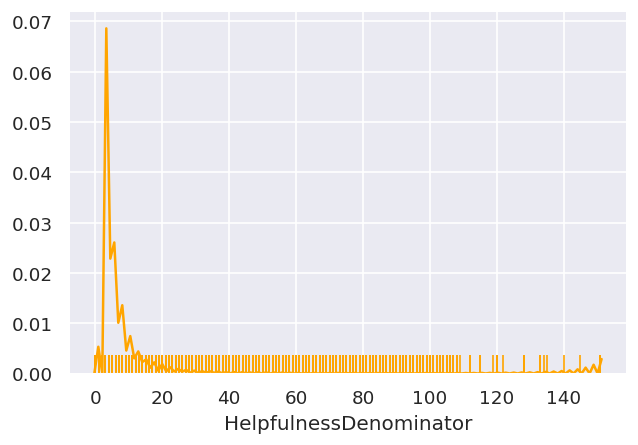

In [0]:
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=100)
figure(dpi=120)
sns.distplot(df.HelpfulnessDenominator, rug=True, hist=False, color = 'orange')

By looking at this plot and considering 3rd quantile value, which is 2, we can choose 10 as cut-off point for HelpfulnessDenominator feature. 

Let's take a look at values bigger than 400.

In [0]:
df.loc[df.HelpfulnessDenominator >= 100].Text.shape[0]

61

In [0]:
#Let's check values bigger 100
df.loc[df.HelpfulnessDenominator >= 100].Text.head(50).tolist()

['hate type many people really enjoy product take look ingredients socalled allnatural product cheddar cheese flavor right front flavor vouch right halfway list ingredients youll see yeast extract unfortunately new msg many people still unaware fact natural food companies taking advantage chemical flavor enhancer whose potential side effects scary google msg yeast extract check',
 'found pregnant first child read baby magazine wonderful health benefits chia seeds packed fatty acids healthy brain function nurtured fatty acids wanted supplement diet something fish oil pills pack fairly unpleasant aftertastebr seeds tiny flavorless mix cereal even juice without ever realizing consumed found adding seeds breakfast keeps fuller longerbr chia seeds convenient flax seeds pound costing around depending seller lasts monthsbr want avoid potential unpleasantness fish oil supplements chia seeds great alternative new expecting mothers great way ensure baby getting needs optimum brain health develop

As we can see, there are still a lot of repetition of the same reviews. We can easily say that there are something wromg with these reviews. Therefore, I will reviews which are HelpfulnessDenominator >= 100. Keep in mind that 3rd quantile value is 2 for this feature. Keeping until 100 is still not a big chop off.

In [0]:
df= df.loc[df.HelpfulnessDenominator <= 100]

###Distribution of stopwords values


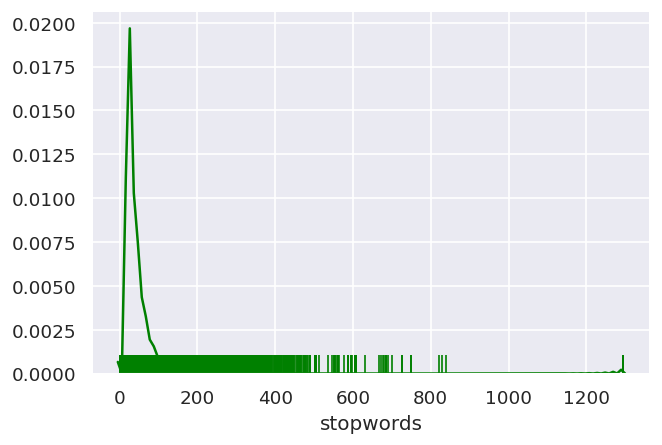

In [0]:
figure(dpi= 120)
sns.distplot(df.stopwords, rug=True, hist=False, color = 'green')

In [0]:
df.loc[df.stopwords >= 900].Text

290789    fuzzy wuzzys summarybr somewhat recommended re...
455358    fuzzy wuzzys summarybr somewhat recommended re...
496714    fuzzy wuzzys summarybr somewhat recommended re...
Name: Text, dtype: object

For stopwords feaure, 40 is the third quantile value. So, let's check the values over 500

In [0]:
df.loc[df.stopwords >= 600].Text

10004     breastfeed month old boy since bilirubin level...
68694     update read update first thanks june august ac...
97604     update tomorrow marks sixmonth anniversary whi...
137977    unfortunately people ill informed vegan cats i...
148910    never reviewed item taking time review baby br...
175170    spent years studying canine nutrition sadly le...
175958    prosbr nearly like sugarbr works great cold be...
181294    unfortunately people ill informed vegan cats i...
204733    month old rottweiler mix came rescue rottboxer...
208251    longer review would usually write food since t...
240291    one thing dont like purina beneful original do...
247108    orderbr put order june plant arrived door june...
253582    spookylicious poptarts cautionary talebr upon ...
265988    longer review would usually write food since t...
269898    spent years studying canine nutrition sadly le...
282333    longer review would usually write food since t...
290789    fuzzy wuzzys summarybr somewha

By looking at these results, we can see that there are duplicate reviews. And, number of stopwords bigger than 600 can safely be considered as outliers because 3rd quantile for this feauture is 40. Therefore, stopwords > 600 will be dropped.

In [0]:
df = df.loc[df.stopwords <= 600]

### Distribution of 'punctuation'


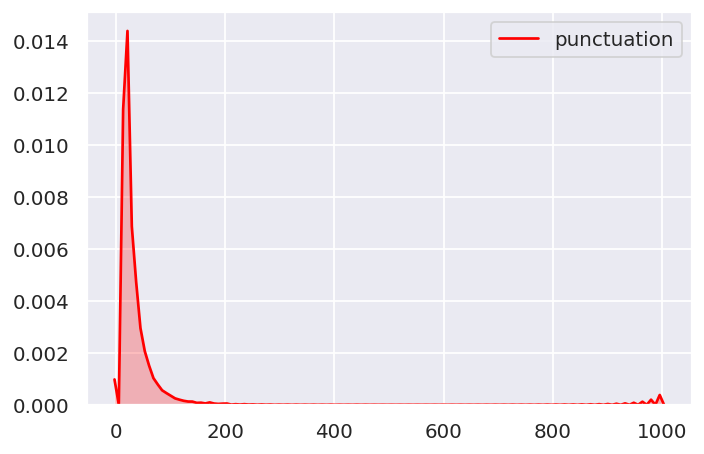

In [0]:
figure(dpi= 130)
sns.kdeplot(df.punctuation,shade=True, color = 'red')

In [0]:
# It looks after 1000, we don't see much values. Let's check those reviews
df.loc[df.punctuation >= 1000].Text.tolist()

['note amazoncombr pretty please put liver subscribe save beef liver beef available ss liver yet thank muchbr reviewbr cat slowly switching newmans beef products wellness brand cat food great brand still reserved treats occasionally ecstatic totally grainandno fillers organic cat food could feed year old cat prone crystal formation bladder plaque build teeth even though brush outer teeth every eveningbr far tried beef liver liver loves ordered beef today sure hell love toobr product thick concentrated beef liver alone consistency concentrated pate beef liver consistency gelatinous thick beefy oatmeal scoop bowl blend bit hot water product warm fats make gravy prefers eat food bit warm anyhow barely wants nibble wellness brand cat food four years guess means hes one sold cat might unusual cat love beef much cat goes crazy beef especially make steak afford find organic grain beef based line cat food made day one nine lives doubtbr anyway know cat already loves beef beef liver heshe proba

In [0]:
# Let's check reviews punctuation > 700
df.loc[df.punctuation >= 700].Text.tolist()

['note amazoncombr pretty please put liver subscribe save beef liver beef available ss liver yet thank muchbr reviewbr cat slowly switching newmans beef products wellness brand cat food great brand still reserved treats occasionally ecstatic totally grainandno fillers organic cat food could feed year old cat prone crystal formation bladder plaque build teeth even though brush outer teeth every eveningbr far tried beef liver liver loves ordered beef today sure hell love toobr product thick concentrated beef liver alone consistency concentrated pate beef liver consistency gelatinous thick beefy oatmeal scoop bowl blend bit hot water product warm fats make gravy prefers eat food bit warm anyhow barely wants nibble wellness brand cat food four years guess means hes one sold cat might unusual cat love beef much cat goes crazy beef especially make steak afford find organic grain beef based line cat food made day one nine lives doubtbr anyway know cat already loves beef beef liver heshe proba

It looks like we are not getting more duplicates at this threshold. Therefore, I will choose 700 as cut-off point for 'punctuation' feature. 

In [0]:
df = df.loc[df.punctuation <= 700]

Let's take a look how the distribution of the punction looks like after dropping outliers:

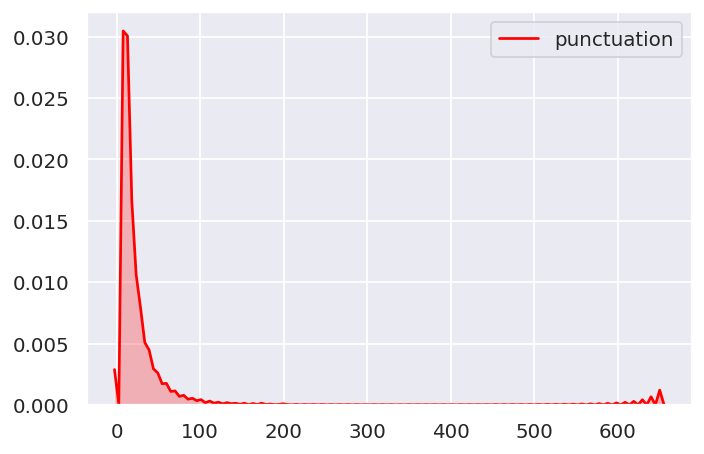

In [0]:
figure(dpi= 130)
sns.kdeplot(df.punctuation,shade=True, color = 'red')

In [0]:
#Let's check the reviews again
df.loc[df.punctuation >= 500].Text.tolist()

['waited quite following impuslse buy smoked salmon spinache mousse manufactured gourmetfoodstore course expensive ahd save quite caloric well however picture gourmet treat finally get andafter returning picture product several timecouldnt resist longer royal treat celebrate royal wedding prince william kate middletonbr well package arrived bit wedding today actually thats ordered bit wedding may exact kept reminding expensive really even queen saves money whenever wherever canbut good least try stuffat least oncebr package marked perishable stood hallway hours morning upon opening outer cardboard box inner styrofoam box repleate coldbags keep pershable food inside fresh came across small browncardboard box held smoked salmon mousse inside one big package expected instead delight sixt small black plastic tubs seems happily matter much order somoked salmon mousse always packed elegant little black plastic tubs black contrasts nicely smoked salmon mousse peeking sides large yellow label 

We still have lots of duplicate reviews. I will assume there exactly same reviews are problematic and bad data. I will drop all exactly same reviews. 

On the other hand, we need to keep mind that short reviews can be same coincidentally. For example, if there are just a couple word reviews, they have higher chance to be exactly same. We don't want to drop them if there are a lot reviews like this. Therefore, let's check the number of reviews that have 3 and lower number of words.

In [0]:
df.loc[df.word_count <=3].Text

156274              excellent product
168537                      excellent
171840                 sorry say like
199664               ok good pumpkins
206498    seller accomadating helpful
234375        favorite excellent item
236327                 try youll like
302586                good little dry
364218             idea growing black
387302        peanuts delicious order
427035                  much else say
446787             price couldf lower
453633                          worth
517276                  item easy use
552299                great make time
568372                         bottle
Name: Text, dtype: object

In [0]:
list(df)

['Id',
 'ProductId',
 'UserId',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text',
 'stopwords',
 'punctuation',
 'hastags',
 'numerics',
 'upper',
 'word_count',
 'char_count',
 'avg_word']

As we can see here, none of them are exactly same reviews. So, if we drop exactly same reviews from the dataset, short reviews will not be affected. 

In [0]:
df= df.drop_duplicates(subset=['Text'])

In [0]:
#We have 567950 rows before dropping duplicates. Now:
df.shape

(392718, 17)

In [0]:
#Let's check high number of punctuation reviews again.
df.loc[df.punctuation >= 500].Text.shape

(30,)

In [0]:
df.loc[df.punctuation >= 500].Text.tolist()

['waited quite following impuslse buy smoked salmon spinache mousse manufactured gourmetfoodstore course expensive ahd save quite caloric well however picture gourmet treat finally get andafter returning picture product several timecouldnt resist longer royal treat celebrate royal wedding prince william kate middletonbr well package arrived bit wedding today actually thats ordered bit wedding may exact kept reminding expensive really even queen saves money whenever wherever canbut good least try stuffat least oncebr package marked perishable stood hallway hours morning upon opening outer cardboard box inner styrofoam box repleate coldbags keep pershable food inside fresh came across small browncardboard box held smoked salmon mousse inside one big package expected instead delight sixt small black plastic tubs seems happily matter much order somoked salmon mousse always packed elegant little black plastic tubs black contrasts nicely smoked salmon mousse peeking sides large yellow label 

In here, there are still so similar reviews. Their ending has slightly different wordings. That's why there are still in the dataset even after dropping duplicates. For now, I will tolerate those reviews.

### Distribution of 'hastags' values

<Figure size 780x520 with 0 Axes>

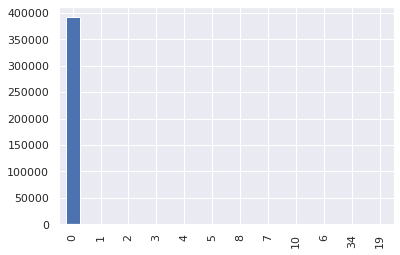

<Figure size 780x520 with 0 Axes>

In [0]:
df.hastags.value_counts().plot(kind= 'bar')
figure(dpi= 130)

In [0]:
df.loc[df.hastags >= 1].Text.shape

(999,)

As we can see from the bar graph, hastags can be dropped because dominant portion of the reviews have no hastag.

In [0]:
df= df.drop('hastags', axis=1)

Distribution of 'numerics'

<Figure size 1440x720 with 0 Axes>

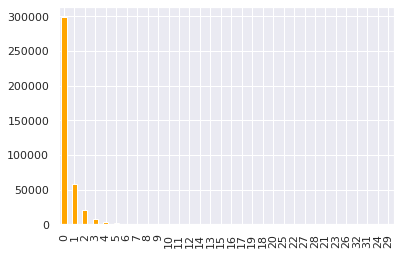

<Figure size 1440x720 with 0 Axes>

In [0]:
df.numerics.value_counts().plot(kind= 'bar', color= 'orange')
figure(figsize= (20,10))

#####By looking at this plot, we see that most of the reviews have 5 or less numerics. 
Let's check reviews that have higher than 20 numerics:

In [0]:
df.loc[df.numerics >=20].Text.shape

(31,)

In [0]:
df.loc[df.numerics >=20].Text.tolist()

['initially purchased good faith brewing iced tea quite difficult find loose tea leaves stores heres initial report impressionsbr tea leaves came loose course packaging terrible bag sealed flap folded tea leaves came bag transport lot tea leaves inside box good would hope future lipton chooses better packaging alternative seal bag dont tea leaves placebr another reviewer mentioned true particular brand little bits pieces tea leaves good quality compared brands always pay get didnt expect better jasmine tea tin costs taste fantastic goal buy cheap black tea leaves loose make lemon iced tea able well thatbr lemon iced tea recipe lot trial error taste testingbr gallon lemon iced teabr gallon waterbr tablespoons lipton black teabr empty teabagsbr cup sugarbr cup lemon juicebr liptons direction call tablespoons lipton black tea make quarts black tea drink know quarts equal gallon used tablespoons black tea would end quarts tea short one gallon tablespoons makes quarts tablespoon would make 

When we look at these reviews, we can see that most of them are about food. We can keep this in mind while making our analysis.

### Distribution of 'upper' values



> Upper stands for number of upper case character

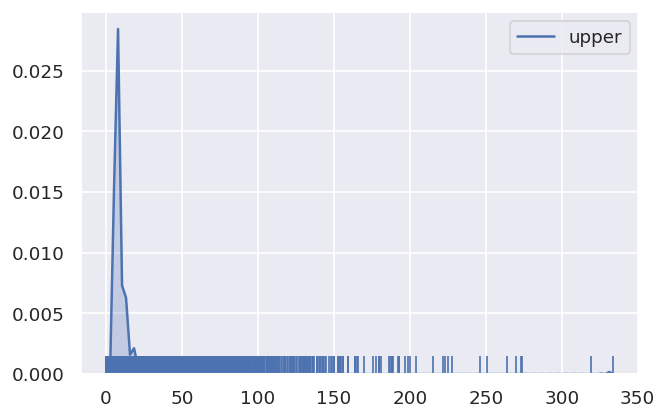

In [0]:
figure(dpi= 120)
sns.kdeplot(df.upper, shade=True, cut=0)
sns.rugplot(df.upper);

#####Let's take a look at reviews that have higher than 250 upper case characters

In [0]:
df.loc[df.upper >=250].Text.tolist()

['searching yrs food come along didnt make beaglegain weightchew feet nonstoplick paws non stopohave white instead pink bellyshaking head itchy ears allergies extra yak put dog foods nowi finallystop searchingthis ultimate best food pure meat added anythingwhen refrigerate one hunk meat slice cube mash u want beagles devours push theor bowls around whole house licking licking give probiotics enzymes give matter food something thats must gives enzymes may missing canned food probiotics give excellent digestionnever boo boo bellies vomiting diarrhea buy amazon called animal essentials best isits powder flavorless course give liquid flaxseed oil buy amazon borleansthe best coats skinusually time year spring summer get bald shedding much couches loaded hair giving food flavors weruva supplements givethey soo much energy cant believe always couch potatoes sleeping timenot anymore highly highly recommend food babies well u know puppiesdogs cats lol feed lot less nutritous garbage ityou tell 

Nothing suspicious here for now

In [0]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word
count,392718.000000,392718.000000,392718.000000,392718.000000,392718.000000,392718.000000,392718.000000,392718.000000,392718.000000,392718.000000,392718.000000
mean,261198.469859,1.626065,2.087251,4.180111,31.734043,17.242064,0.421896,3.379720,41.051747,266.570053,5.615777
std,167035.414163,4.207903,4.915649,1.311202,30.482304,23.434588,1.038620,5.787094,40.439507,266.316073,0.519883
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,112437.250000,0.000000,0.000000,4.000000,13.000000,5.000000,0.000000,1.000000,17.000000,111.000000,5.300000
50%,248600.500000,0.000000,1.000000,5.000000,23.000000,10.000000,0.000000,2.000000,29.000000,186.000000,5.600000
75%,407034.750000,2.000000,2.000000,5.000000,40.000000,20.000000,0.000000,4.000000,50.000000,323.000000,5.900000
max,568454.000000,100.000000,100.000000,5.000000,597.000000,653.000000,32.000000,334.000000,1090.000000,7664.000000,9.900000


###Distribution of word_count values

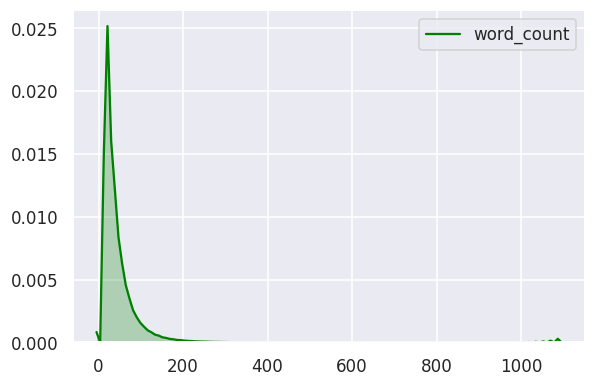

In [0]:
figure(dpi= 110)
sns.kdeplot(df.word_count,shade=True, color = 'green')

#####Let's take a look at reviews that have higher than 800 words

In [0]:
df.loc[df.word_count >=800].Text.tolist()

['find upon grand amazonbr day morinu feeds like nourishing mother cherishes consents whims wonderful foodbr eschew animal byproducts cadaversbr tofu strengthening food fit human consumptionbr convenient mighty amazon sent right front porch case post office box free shipping rather driving thirty seventy five miles product three times price plus gasbr fit food humans food bodies created food feeds us rather kills source consumerbr may read written selfdeceived tofu mushy firmness must pressed towels cooking confused askbr cookingbr day least day draw forth serrated knife one sacrificial box excellent tofu without remorse slice hole top great tenderness care gratitude releasing slightest apologetic gentle spurt clearest liquidbr certain yearningbr observe indications written sternly upon short edge box lie box gently upon smooth flat slab wood face take knife gently sliding upon edge top belly box upon edge top gently along bottom edge top time releasing apologetically slightest hint cl

In [0]:
df.loc[df.word_count >=900].Text

124837    excellent christmas gift birthday time gifti w...
230018    green tea ingredient slows breast cancerantiox...
242707    see pics ruler show size came double boxed pac...
248833    weight loss benefits green teabr drink green t...
276001    serious gopher problems years effective point ...
402671    eden dried montmorency cherries perfection del...
Name: Text, dtype: object

Nothing suspicious here in number of words

###Distribution of char_count values

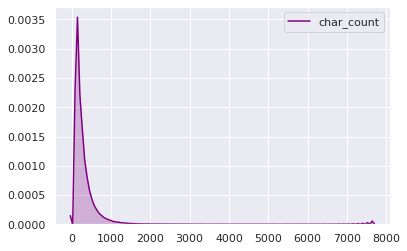

In [0]:
sns.kdeplot(df.char_count,shade=True, color = 'purple')

#####Let's take a look at reviews that have higher than 6000 characters

In [0]:
df.loc[df.char_count >= 6000].Text.shape

(8,)

In [0]:
df.loc[df.char_count >= 6000].Text.tolist()

['find upon grand amazonbr day morinu feeds like nourishing mother cherishes consents whims wonderful foodbr eschew animal byproducts cadaversbr tofu strengthening food fit human consumptionbr convenient mighty amazon sent right front porch case post office box free shipping rather driving thirty seventy five miles product three times price plus gasbr fit food humans food bodies created food feeds us rather kills source consumerbr may read written selfdeceived tofu mushy firmness must pressed towels cooking confused askbr cookingbr day least day draw forth serrated knife one sacrificial box excellent tofu without remorse slice hole top great tenderness care gratitude releasing slightest apologetic gentle spurt clearest liquidbr certain yearningbr observe indications written sternly upon short edge box lie box gently upon smooth flat slab wood face take knife gently sliding upon edge top belly box upon edge top gently along bottom edge top time releasing apologetically slightest hint cl

Again, nothing suspicious here. No reason to drop any review for now.

###Distribution of avg_word length

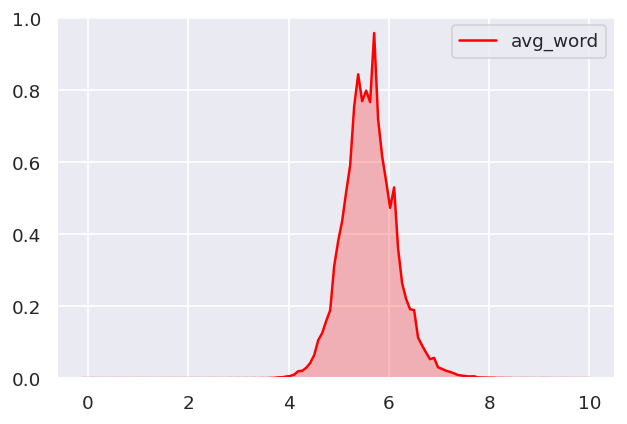

In [0]:
figure(dpi=120)
sns.kdeplot(df.avg_word,shade=True, color = 'red')

I don't have any idea how mean word length will help me in my analysis. Still, having this feature doesn't hurt the analysis.

Now, let's check latest condition of the dataset because we have dropped many values

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392718 entries, 0 to 568410
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      392718 non-null  int64  
 1   ProductId               392718 non-null  object 
 2   UserId                  392718 non-null  object 
 3   HelpfulnessNumerator    392718 non-null  int64  
 4   HelpfulnessDenominator  392718 non-null  int64  
 5   Score                   392718 non-null  int64  
 6   Time                    392718 non-null  object 
 7   Summary                 392385 non-null  object 
 8   Text                    392717 non-null  object 
 9   stopwords               392718 non-null  int64  
 10  punctuation             392718 non-null  int64  
 11  numerics                392718 non-null  int64  
 12  upper                   392718 non-null  int64  
 13  word_count              392718 non-null  int64  
 14  char_count          

It looks number of the rows has become 392761 . It was 568411 before dropping duplicate values.


---



---



---



### Distribution of Scores

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Text(0.5, 1.0, 'Distribution of Scores')

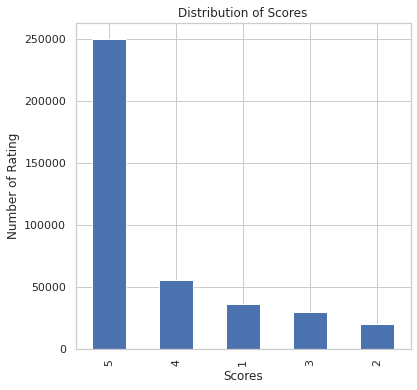

In [0]:
df.Score.value_counts(ascending = False).plot(kind= 'bar', figsize= (6,6))
plt.xlabel("Scores")
plt.ylabel('Number of Rating')
plt.title('Distribution of Scores')

Let's create the same graph in a more colorful way

Text(0.5, 1.0, 'Distribution of Scores')

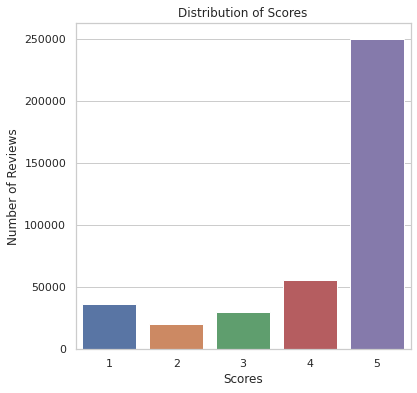

In [0]:
a = df.groupby(['Score'])['Id'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'Number of Reviews'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='Score', y='Number of Reviews', data=a)
plt.xlabel("Scores")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Scores')

Most of the reviews are 5 stars. This is an unbalanced distribution.


---



---



### Number of Characters in Reviews

In [0]:
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


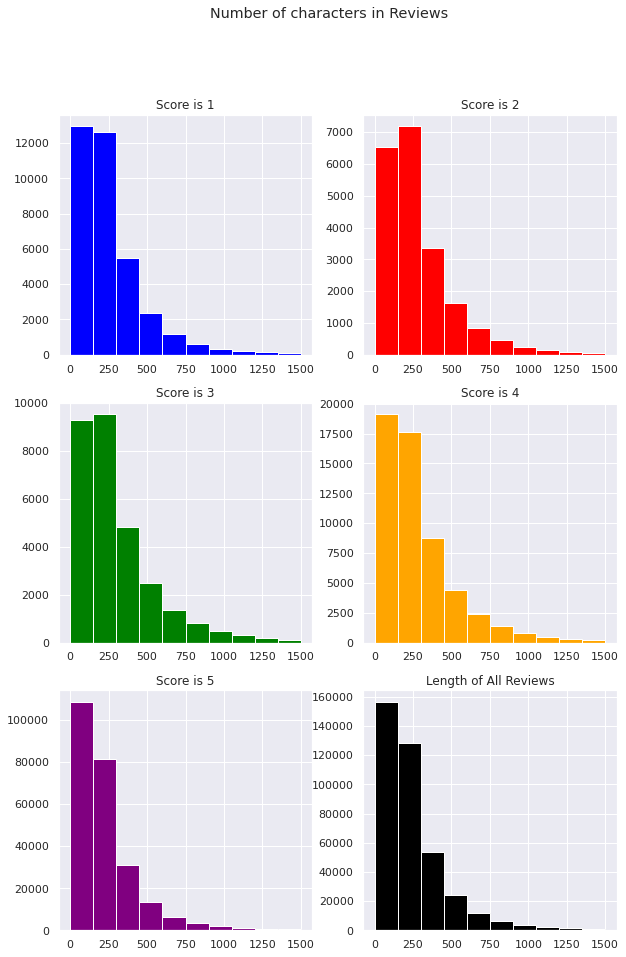

In [0]:
fig, axs = plt.subplots(3,2, figsize=(10, 15))

#Score 1
review_len = df.loc[df['Score']==1]['Text'].str.len()
axs[0,0].hist(review_len, color='blue', range=(0,1500))
axs[0,0].set_title('Score is 1')

#Score 2
review_len = df.loc[df['Score']==2]['Text'].str.len()
axs[0,1].hist(review_len, color='red',range=(0,1500))
axs[0,1].set_title('Score is 2')

#Score 3
review_len = df.loc[df['Score']==3]['Text'].str.len()
axs[1,0].hist(review_len, color='green', range=(0,1500))
axs[1,0].set_title('Score is 3')

#Score 4
review_len = df.loc[df['Score']==4]['Text'].str.len()
axs[1,1].hist(review_len, color='orange', range=(0,1500))
axs[1,1].set_title('Score is 4')


#Score 5
review_len = df.loc[df['Score']==5]['Text'].str.len()
axs[2,0].hist(review_len, color='purple', range=(0,1500))
axs[2,0].set_title('Score is 5')

#All Scores
review_len = df['Text'].str.len()
axs[2,1].hist(review_len, color='black', range=(0,1500))
axs[2,1].set_title('Length of All Reviews')


fig.suptitle('Number of characters in Reviews')

plt.show()

####**After this point, I will convert 'Score' to a binary feature.

*   Score values 1, 2 and 3 will be coded as 0 (zero)
*   Score values 4 and 5 will be coded as 1





In [0]:
df['Good_reviews']= df.Score
df.Good_reviews[df.Score <= 3] = 0
df.Good_reviews[df.Score >= 4] = 1

Text(0.5, 1.0, 'Distribution of Good Reviews')

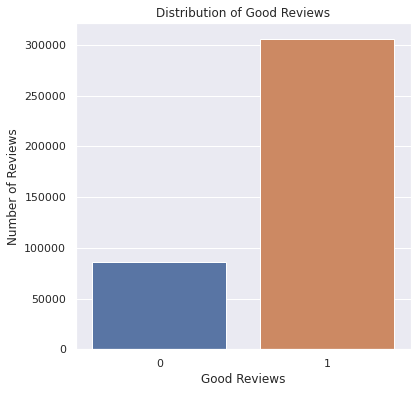

In [0]:
a = df.groupby(['Good_reviews'])['Id'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'Number of Reviews'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='Good_reviews', y='Number of Reviews', data=a)
plt.xlabel("Good Reviews")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Good Reviews')

In [0]:
df.Good_reviews.sample(10)

Distribution of Number of Words for Reviews


In [0]:
list(df)

['Id',
 'ProductId',
 'UserId',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text',
 'stopwords',
 'punctuation',
 'numerics',
 'upper',
 'word_count',
 'char_count',
 'avg_word',
 'Good_reviews']

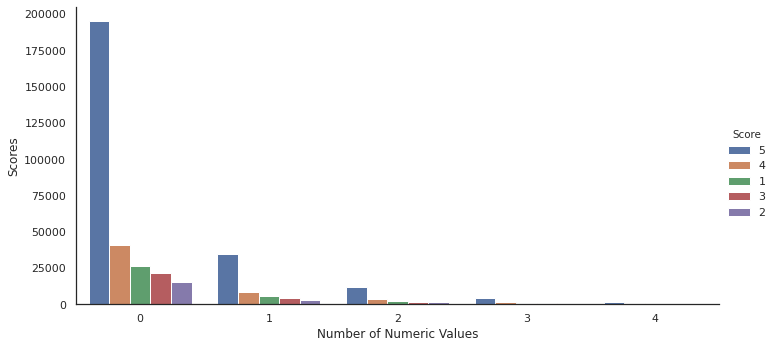

In [0]:
# Now, let's take a look at the Number of Words number for tweets

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= df.loc[df.numerics <= 4], aspect= 2, kind='count', 
                    hue='Score', hue_order=df['Score'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Scores')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')



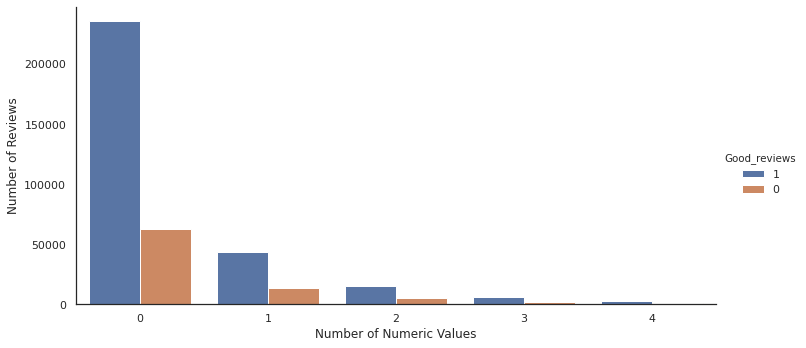

In [0]:
# Now, let's take a look at the Number of Words number for Reviews

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= df.loc[df.numerics <= 4], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')

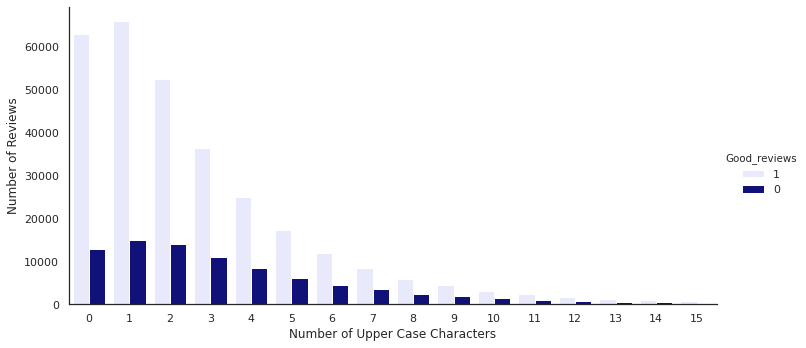

In [0]:
# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'upper', data= df.loc[df.upper <= 15], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index, color= 'DarkBlue')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Number of Upper Case Characters')
    g.set_titles('Distrubition of Number of Upper Case Characters for Reviews')

#####Let's check  HelpfulnessNumerator vs Good_reviews 

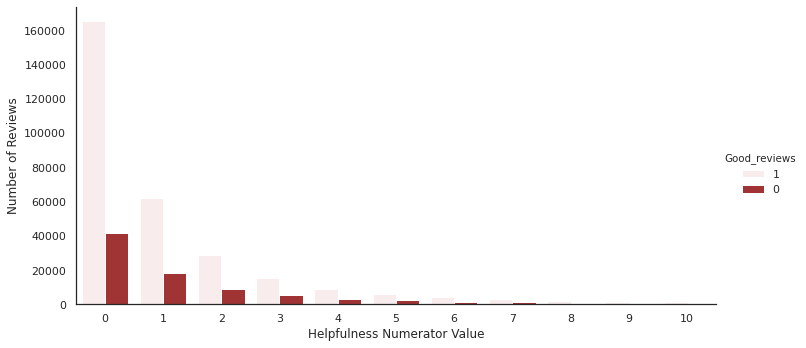

In [0]:
# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'HelpfulnessNumerator', data= df.loc[df.HelpfulnessNumerator <= 10], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index, color = 'Firebrick')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Helpfulness Numerator Value')
    g.set_titles('Distrubition of HelpfulnessNumerator for Reviews')

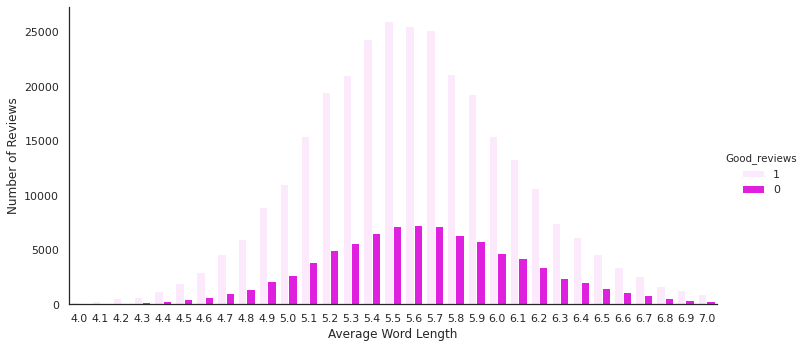

In [0]:
#Average Word Length

# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'avg_word', data= df.loc[(df.avg_word <= 7) & (df.avg_word >= 4)], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index, color = 'Magenta')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Average Word Length')
    g.set_titles('Distrubition of HelpfulnessNumerator for Reviews')

As we can see from the plot, the distributions are normal distribution for both good and bad reviews

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392718 entries, 0 to 568410
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      392718 non-null  int64  
 1   ProductId               392718 non-null  object 
 2   UserId                  392718 non-null  object 
 3   HelpfulnessNumerator    392718 non-null  int64  
 4   HelpfulnessDenominator  392718 non-null  int64  
 5   Score                   392718 non-null  int64  
 6   Time                    392718 non-null  object 
 7   Summary                 392385 non-null  object 
 8   Text                    392717 non-null  object 
 9   stopwords               392718 non-null  int64  
 10  punctuation             392718 non-null  int64  
 11  numerics                392718 non-null  int64  
 12  upper                   392718 non-null  int64  
 13  word_count              392718 non-null  int64  
 14  char_count          

In [0]:
df['Time']= pd.to_datetime(df.Time)

In [0]:
df.Time

Text(0.5, 1.0, 'Mean Revies Scores - Monthly')

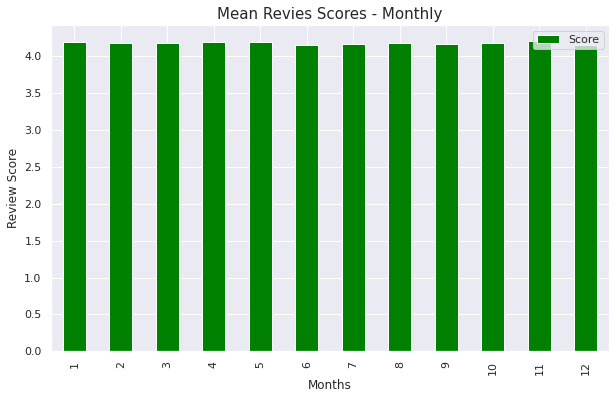

In [0]:
df[['Score']].groupby(df["Time"].dt.month).mean().plot(kind="bar", figsize= (10,6), color ='green')
plt.xlabel('Months')
plt.ylabel('Review Score')
plt.title('Mean Revies Scores - Monthly', fontsize=15)

Text(0.5, 1.0, 'Mean Revies Scores - Monthly')

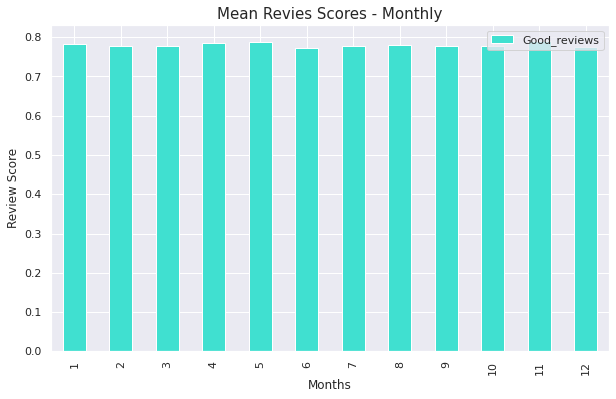

In [0]:
df[['Good_reviews']].groupby(df["Time"].dt.month).mean().plot(kind="bar", figsize= (10,6), color ='turquoise')
plt.xlabel('Months')
plt.ylabel('Review Score')
plt.title('Mean Reviews Scores - Monthly', fontsize=15)

As we can see here, month doesn't have a visible affect on score. All of them over 4 out of 5.

##### Let's check historic distribution of total number of scores

Text(0.5, 1.0, 'Number of Reviews in Time')

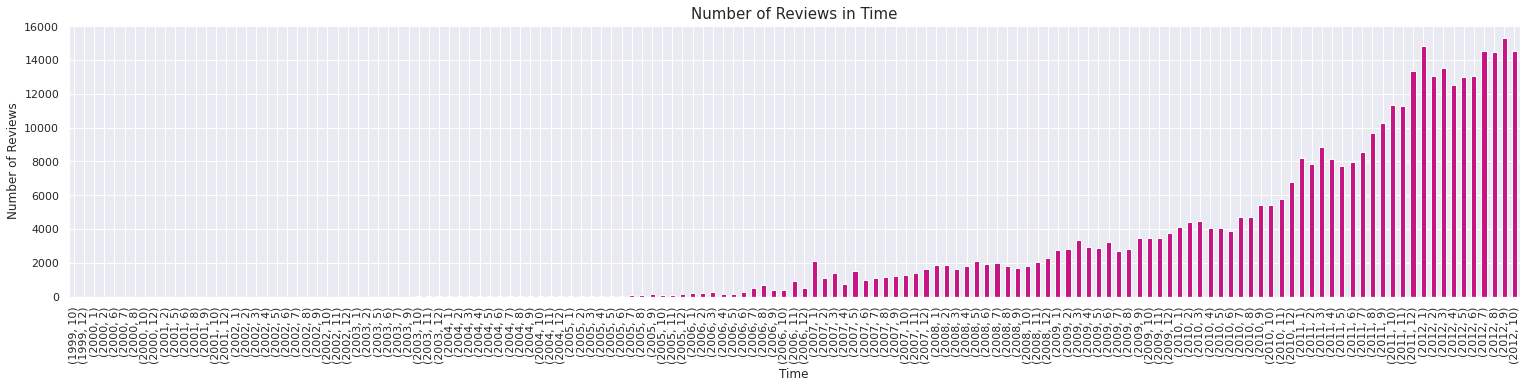

In [0]:
df.Score.groupby('city')[df["Time"].dt.year, df["Time"].dt.month]).count().plot(kind="bar", figsize=(26,5), color = 'mediumvioletred')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Time', fontsize=15)

In [0]:
a= df.loc[df.Time > '03-01-2005']

Text(0.5, 1.0, 'Number of Reviews in Time')

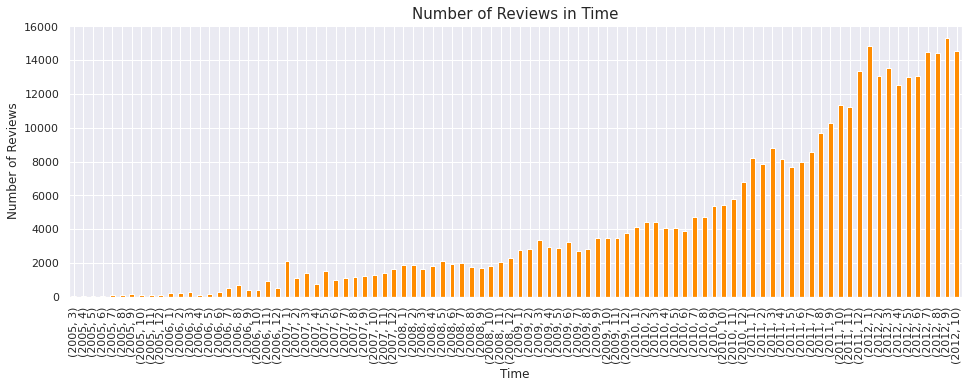

In [0]:
a.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count().plot(kind="bar", figsize=(16,5), color = 'darkorange')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Time',fontsize=15)

Text(0.5, 1.0, 'Number of Reviews in Time')

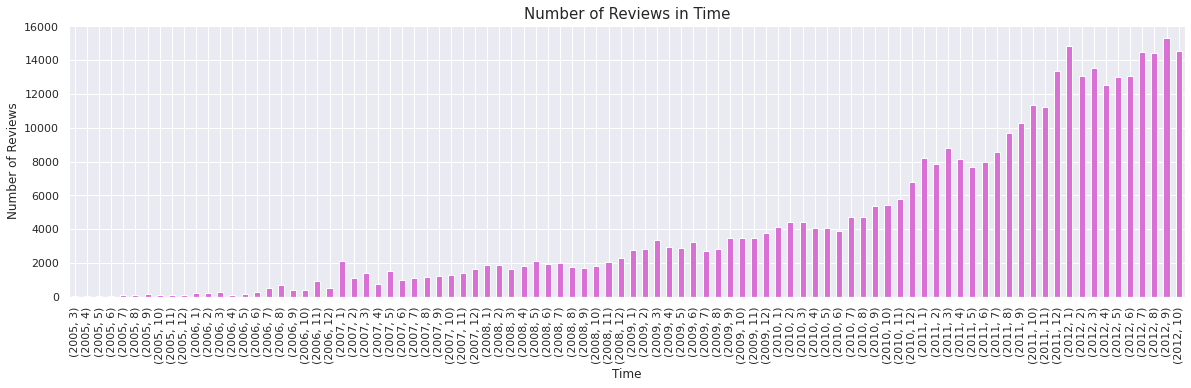

In [0]:
#Let's create the similar time graph for later use:
a.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count().plot(kind="bar", figsize=(20,5), color = 'orchid')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Time', fontsize=15)

Text(0.5, 1.0, 'Number of Reviews in Between 1999 and 2005')

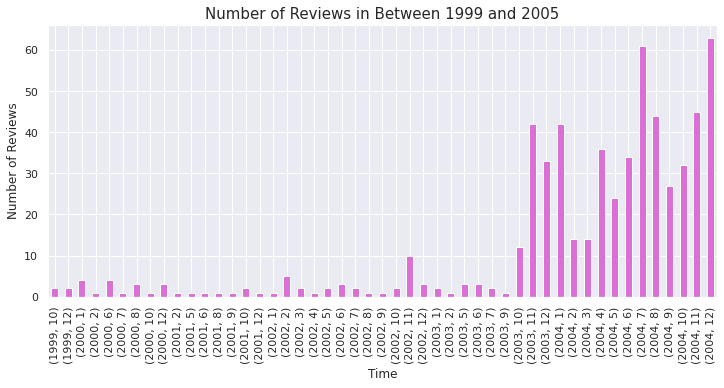

In [0]:
b= df.loc[df.Time < '01-01-2005']

b.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count().plot(kind="bar", figsize=(12,5), color = 'orchid')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Between 1999 and 2005',fontsize=15)

Let's create this same plot with different tool

In [0]:
import plotly.graph_objects as go
import datetime

fig = go.Figure(data=[go.Bar(y =df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count())])
fig.update_layout(title_text='Time Series for Total Number of Scores with Rangeslider',
                  xaxis_rangeslider_visible=True)

##### Time Series for Mean Score with Rangeslider

In [0]:
import plotly.graph_objects as go
import datetime

fig = go.Figure(data=[go.Bar(y =df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean())])
fig.update_layout(title_text='Time Series for Average Score with Rangeslider',
                  xaxis_rangeslider_visible=True)

##### Mean of the Scores over the time

Text(0.5, 1.0, 'Average Score of Reviews in Time')

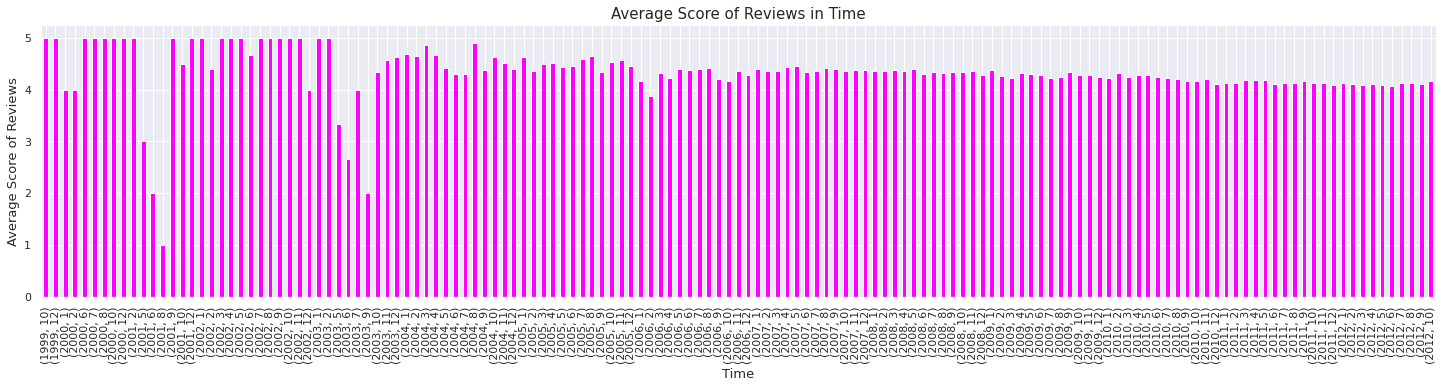

In [0]:
df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean().plot(kind="bar", figsize=(25,5), color = 'magenta')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average Score of Reviews', fontsize=13)
plt.title('Average Score of Reviews in Time', fontsize=15)

It looks like something happened in (2005,05) and mean of the reviews never saw the value of 5 after this date.

Text(0.5, 1.0, 'Average Good Review Distribution of Reviews in Time')

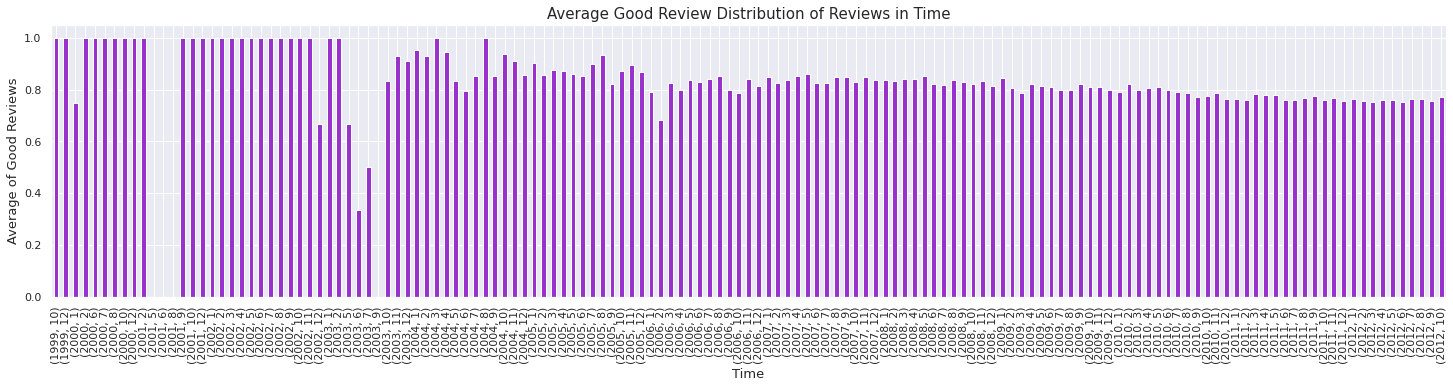

In [0]:
#Same graph for Good_reviews feature

df.Good_reviews.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean().plot(kind="bar", figsize=(25,5), color = 'Darkorchid')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average of Good Reviews', fontsize=13)
plt.title('Average Good Review Distribution of Reviews in Time', fontsize=15)

Text(0.5, 1.0, 'Average Good Review Distribution of Reviews in Time')

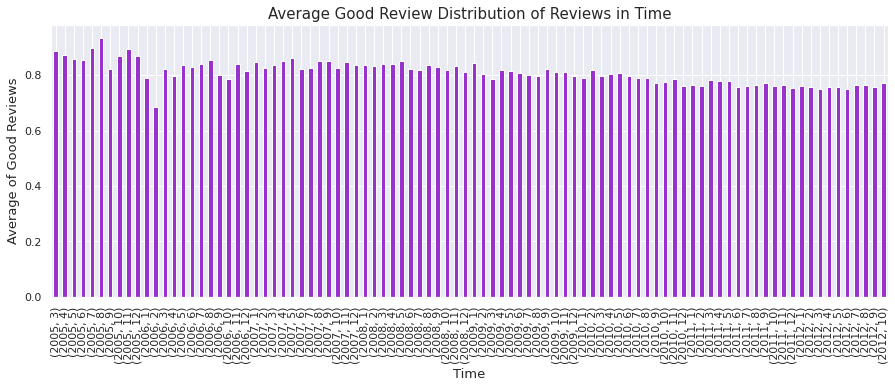

In [0]:
a.Good_reviews.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean().plot(kind="bar", figsize=(15,5), color = 'Darkorchid')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average of Good Reviews', fontsize=13)
plt.title('Average Good Review Distribution of Reviews in Time', fontsize=15)

Text(0.5, 1.0, 'Average Good Review Distribution of Reviews in Time')

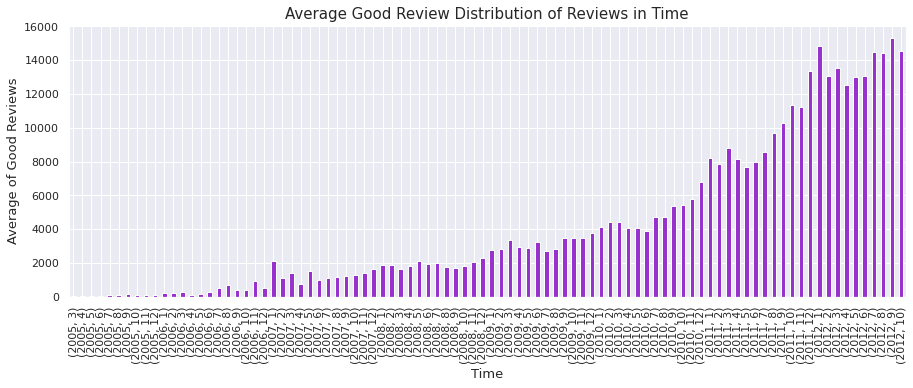

In [0]:
a.Good_reviews.groupby([df["Time"].dt.year, df["Time"].dt.month]).size().plot(kind="bar", figsize=(15,5), color = 'Darkorchid')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average of Good Reviews', fontsize=13)
plt.title('Average Good Review Distribution of Reviews in Time', fontsize=15)

##### Let's take a look at pair plot

In [0]:
#sns.pairplot(df)

In [0]:
df.to_csv('Amazon_reviews_cleaned_finalform.csv', index=False)

In [0]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
#Libraries for visualization
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

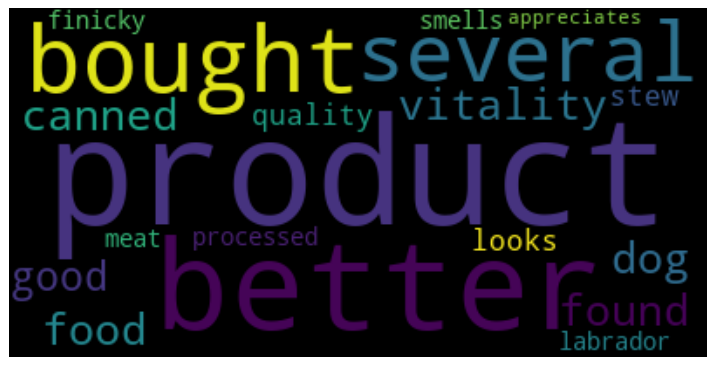

In [0]:
# Start with one review:
abc = df.Text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(abc)

# Display the generated image:
figure(figsize= (10,10), dpi= 90)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
df['Text']= df['Text'].astype(str)

In [0]:
#Word cloud for the all reviews
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text_for_cloud = " ".join(x for x in df.Text)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 103546819 words in the combination of all reviews.


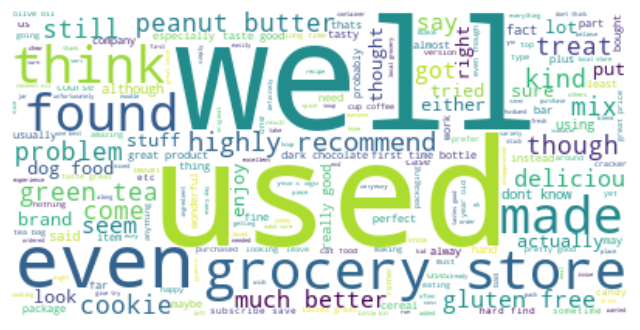

In [0]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

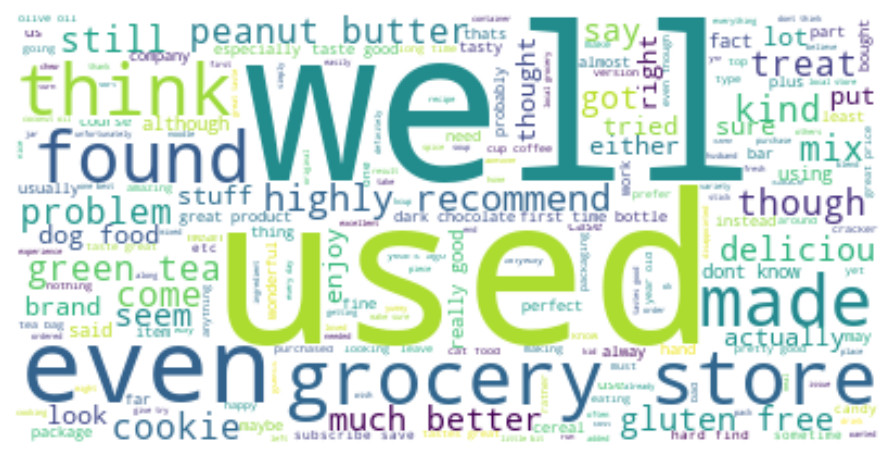

In [0]:
# Let's increase the dpi:
figure(figsize= (8,8), dpi= 140)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

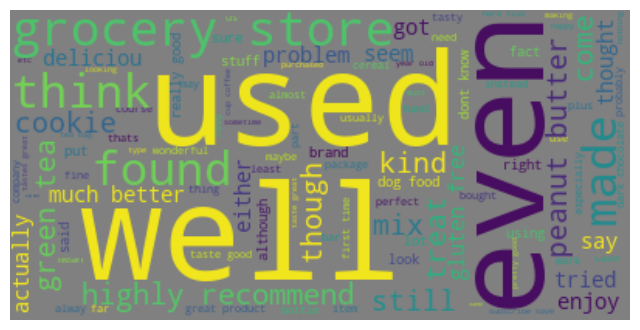

In [0]:
wordcloud = WordCloud(stopwords=stopwords, background_color="grey", max_words= 100).generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20]
freq

like       169606
good       134510
taste      115701
one        114872
great      112013
product    105542
flavor      96173
coffee      95094
tea         89578
would       83684
love        83266
get         73183
really      68577
food        65695
dont        64620
much        63502
use         61178
little      57088
time        55861
amazon      54737
dtype: int64

In [0]:
''' 
# Generate a word cloud image
mask = np.array(Image.open("url"))
wordcloud_por = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(por)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/por_wine.png", format="png")
#plt.show()